In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

In [2]:
cols = ['test_acc',
        'train_time',
        'entropy__bal_acc', 
        'entropy__auc']

In [3]:
experiments = ['convolutional', 'convolutional-dropout', 'convolutional-poor-bayesian']

In [13]:
ha = pd.read_csv('convolutional-poor-bayesian_with_unknown.csv')
ha

,train_time,dataset,test_acc,inside_labels,unknown_labels,epochs,pred_std__bal_acc,pred_std__f1_score,pred_std__auc,entropy__bal_acc,entropy__f1_score,entropy__auc
0,808.209604,svhn,0.462452,"[0, 1, 4, 8]","[7, 9]",100.0,0.500000,0.666667,0.500000,0.500000,0.666667,0.500000
1,791.839657,svhn,0.960548,"[0, 1, 4, 8]","[7, 9]",100.0,0.777142,0.757966,0.801622,0.825654,0.829767,0.919257
2,792.366259,svhn,0.961364,"[0, 1, 4, 8]","[7, 9]",100.0,0.770268,0.750748,0.786495,0.826077,0.829219,0.918339
3,748.782613,svhn,0.160371,"[2, 4, 7, 8]","[3, 6]",100.0,0.500683,0.666667,0.496669,0.500000,0.666667,0.500254
4,748.716970,svhn,0.963385,"[2, 4, 7, 8]","[3, 6]",100.0,0.758473,0.740032,0.826352,0.861528,0.858624,0.927614
5,747.154538,svhn,0.965511,"[2, 4, 7, 8]","[3, 6]",100.0,0.769316,0.735701,0.833725,0.862074,0.858746,0.925763
6,779.749591,svhn,0.951537,"[2, 3, 6, 8]","[0, 5]",100.0,0.802066,0.782095,0.851792,0.826338,0.820697,0.913817
7,777.860188,svhn,0.950131,"[2, 3, 6, 8]","[0, 5]",100.0,0.799066,0.779434,0.852590,0.821905,0.819219,0.914442
8,790.180942,svhn,0.155606,"[2, 3, 6, 8]","[0, 5]",100.0,0.500000,0.666667,0.500000,0.500000,0.666667,0.500000
9,685.336663,svhn,0.952823,"[3, 5, 7, 8]","[2, 4]",100.0,0.817974,0.801569,0.849547,0.841359,0.838438,0.918113


In [4]:
dfs = []
for exp in experiments:
    df_with = pd.read_csv(exp+'_with_unknown.csv')
    df_with_results = df_with.groupby(['inside_labels', 'unknown_labels']).mean()[cols]
    df_without = pd.read_csv(exp+'_out_unknown.csv')
    df_without_results = df_without.groupby(['inside_labels', 'unknown_labels']).mean()[cols]
    dfs.append([exp, df_with_results, df_without_results])

In [5]:
results_cols = ['inside', 'outside',
                'in_test_acc', 'out_test_acc',
                'in_train_time', 'out_train_time',
                'in_entropy_acc', 'out_entropy_acc',
                'in_entropy_auc', 'out_entropy_auc']

dfs_results = []
for exp, df_with, df_without in dfs:
    results = pd.DataFrame(columns=results_cols)
    for (in_key, *in_row), (out_key, *out_row) in zip(df_with.itertuples(), df_without.itertuples()):
        assert in_key == out_key
        results.loc[len(results)] = [
            in_key[0], in_key[1],
            in_row[0], out_row[0],
            in_row[1], out_row[1],
            in_row[2], out_row[2],
            in_row[3], out_row[3],
        ]
    dfs_results.append([exp, results])

In [6]:
final_results_cols = ['inside', 'outside']
for c in results_cols[2:]:
    for exp, _ in dfs_results:
        final_results_cols.append(exp+'_'+c)

In [7]:
final_results = pd.DataFrame(columns=final_results_cols)
for key_row  in zip(*[df.itertuples() for exp, df in dfs_results]):
    for i in range(1, len(key_row)):
        _, *prev_row = key_row[i-1]
        _, *row = key_row[i]
        assert prev_row[0] == row[0]
        assert prev_row[1] == row[1]
        
    _, *row = key_row[0]
    new_row = [row[0], row[1]]
    
    for c in range(2, len(results_cols)):
        for _, *row in key_row:
            new_row.append(row[c])

    final_results.loc[len(final_results)] = new_row

In [8]:
final_results.columns

Index(['inside', 'outside', 'convolutional_in_test_acc',
       'convolutional-dropout_in_test_acc',
       'convolutional-poor-bayesian_in_test_acc', 'convolutional_out_test_acc',
       'convolutional-dropout_out_test_acc',
       'convolutional-poor-bayesian_out_test_acc',
       'convolutional_in_train_time', 'convolutional-dropout_in_train_time',
       'convolutional-poor-bayesian_in_train_time',
       'convolutional_out_train_time', 'convolutional-dropout_out_train_time',
       'convolutional-poor-bayesian_out_train_time',
       'convolutional_in_entropy_acc', 'convolutional-dropout_in_entropy_acc',
       'convolutional-poor-bayesian_in_entropy_acc',
       'convolutional_out_entropy_acc',
       'convolutional-dropout_out_entropy_acc',
       'convolutional-poor-bayesian_out_entropy_acc',
       'convolutional_in_entropy_auc', 'convolutional-dropout_in_entropy_auc',
       'convolutional-poor-bayesian_in_entropy_auc',
       'convolutional_out_entropy_auc',
       'convolut

<IPython.core.display.Javascript object>


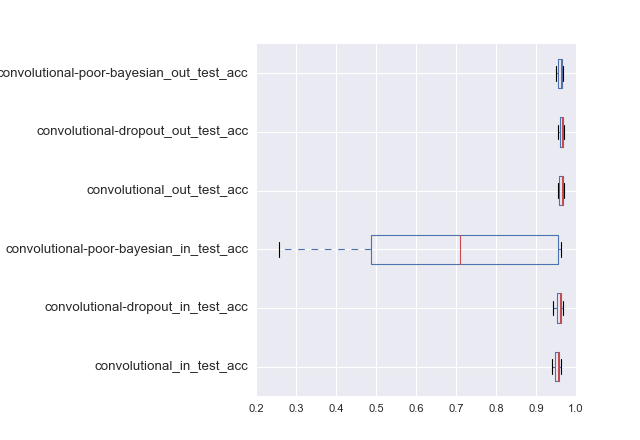

In [9]:
plt.figure()
plt.rcParams['figure.figsize'] = (10, 15)
final_results.boxplot(return_type='axes', vert=False, column=list(final_results.columns)[2:8])
plt.subplots_adjust(left=0.4)

<IPython.core.display.Javascript object>


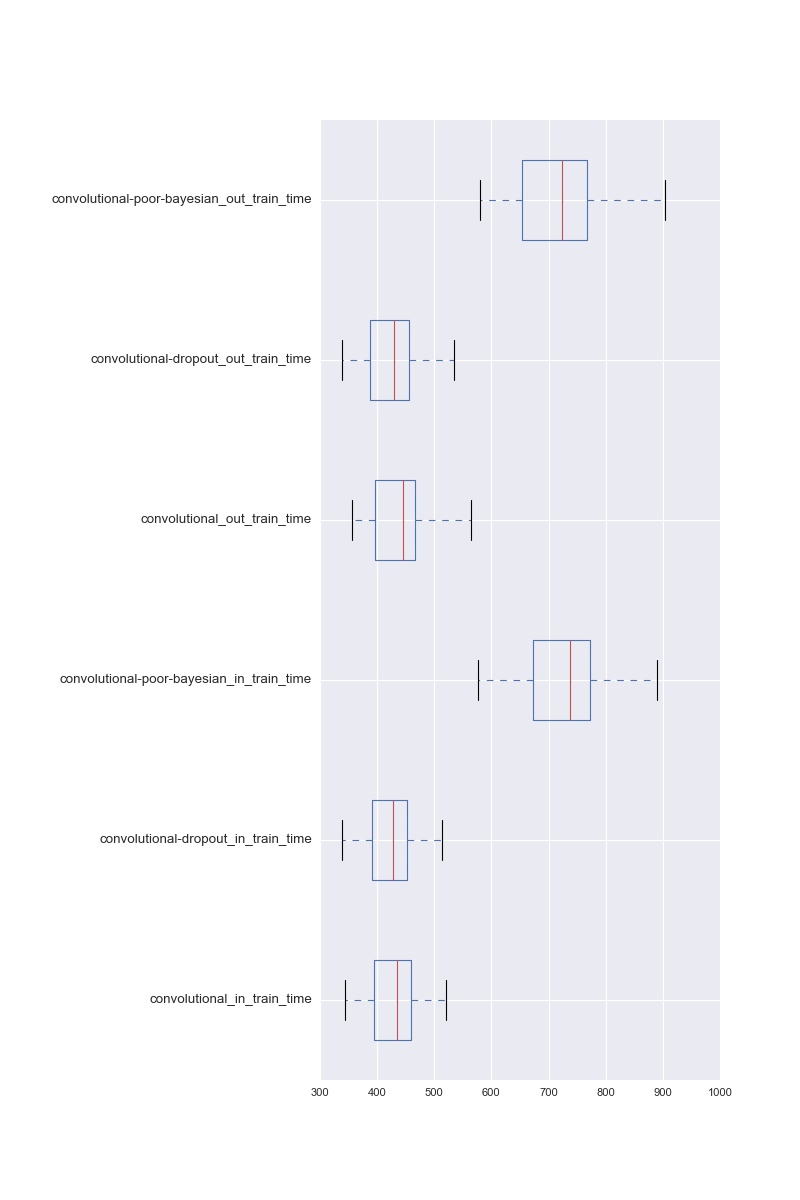

In [10]:
plt.figure()
plt.rcParams['figure.figsize'] = (10, 15)
final_results.boxplot(return_type='axes', vert=False, column=list(final_results.columns)[8:14])
plt.subplots_adjust(left=0.4)

<IPython.core.display.Javascript object>


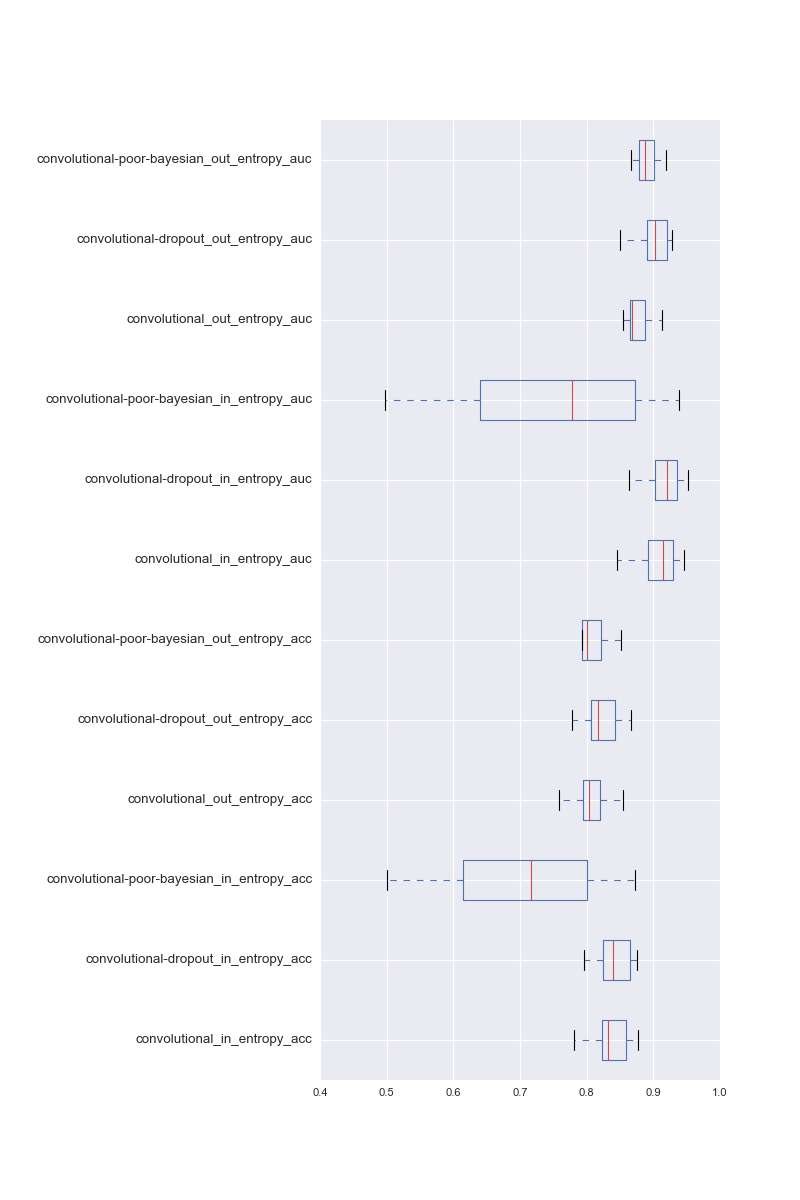

In [11]:
plt.figure()
plt.rcParams['figure.figsize'] = (10, 5)
final_results.boxplot(return_type='axes', vert=False, column=list(final_results.columns)[14::])
plt.subplots_adjust(left=0.4)